In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'fifa_eda_stats.csv' 
df = pd.read_csv(file_path)
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


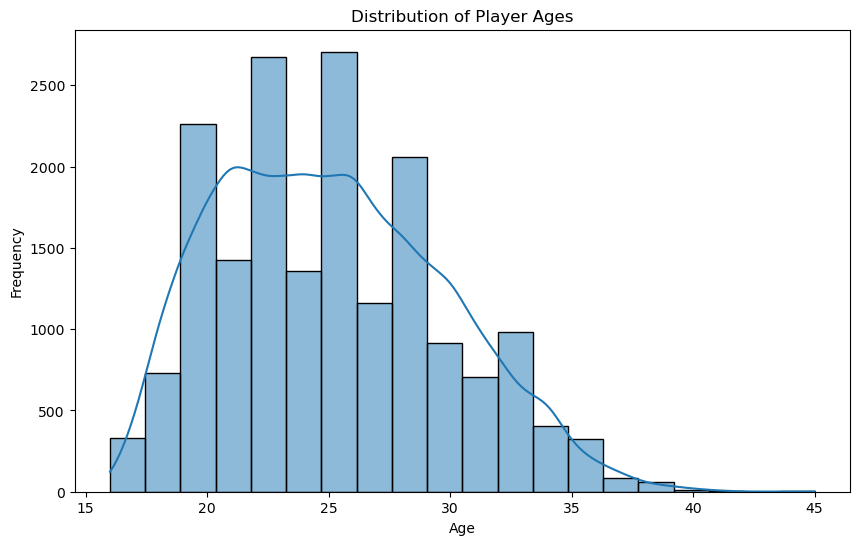

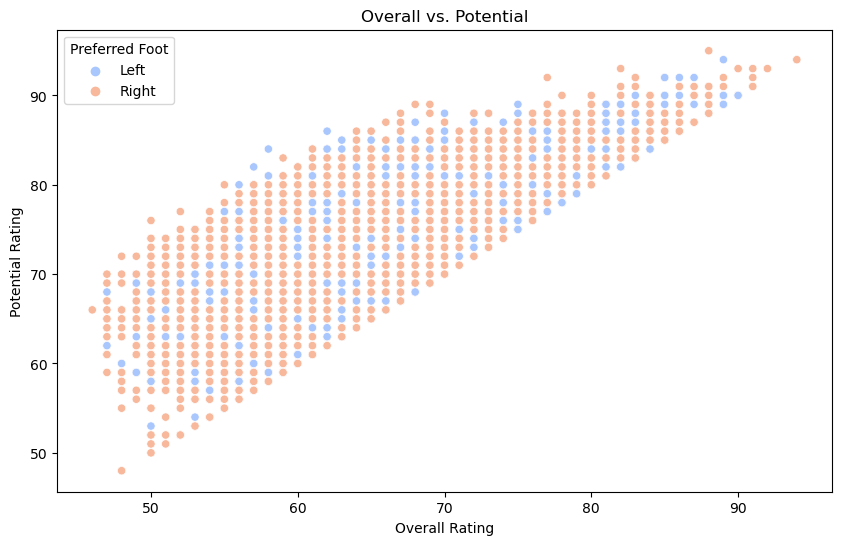

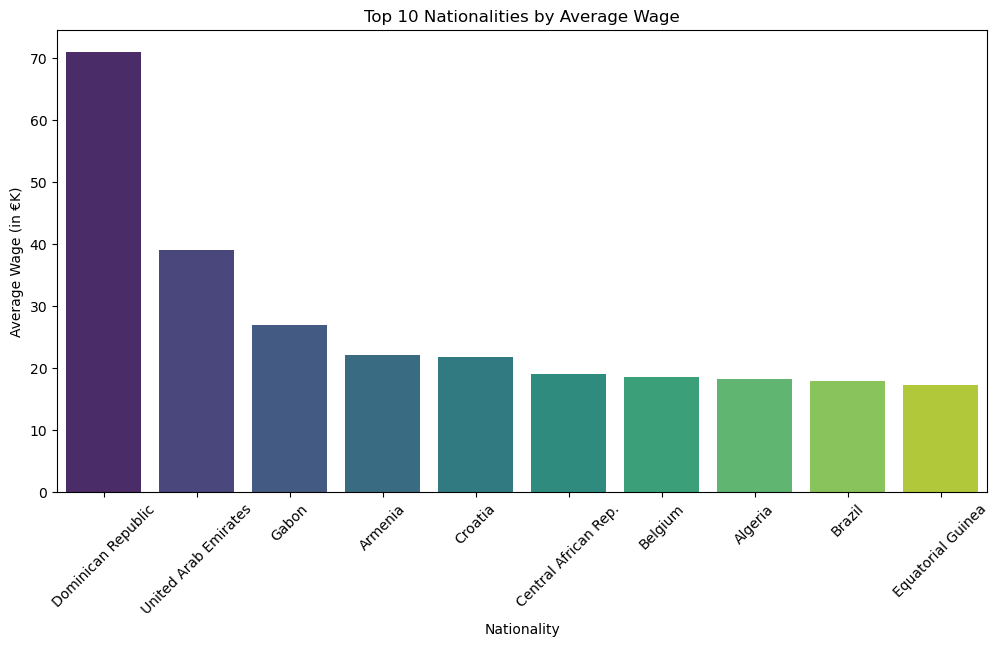

In [10]:
# Cleaning and Preprocessing
df_cleaned = df.copy()

df_cleaned['Value'] = df_cleaned['Value'].replace('[\€KM]', '', regex=True).astype(float)
df_cleaned['Wage'] = df_cleaned['Wage'].replace('[\€KM]', '', regex=True).astype(float)


df_cleaned = df_cleaned.dropna(subset=['Wage', 'Nationality'])


# Distribution of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Overall vs. Potential
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall', y='Potential', data=df_cleaned, hue='Preferred Foot', palette='coolwarm')
plt.title('Overall vs. Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.show()

# Average Wage by Nationality
avg_wage_by_nationality = df_cleaned.groupby('Nationality')['Wage'].mean().sort_values(ascending=False).head(10)

#  bar chart to compare team rankings in different seasons.
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_wage_by_nationality.index, y=avg_wage_by_nationality.values, palette='viridis')
plt.title('Top 10 Nationalities by Average Wage')
plt.xlabel('Nationality')
plt.ylabel('Average Wage (in €K)')
plt.xticks(rotation=45)
plt.show()
